In [11]:
import pandas as pd

#null처리함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    #방법1 df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True) #방법2
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df['Cabin'].str[0]
    features = ['Sex', 'Cabin', 'Embarked'] #숫자로 나타낼 핑드
    for feature in features:
        le= LabelEncoder()
        df[feature]=le.fit_transform(df[feature])
    return df

#앞에 만든 함수를 차례대로 실행
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

def get_clf_eval(y_test, pred):
    from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율:{recall:.4f}')

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test =  train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[93 17]
 [20 49]]
정확도:0.7933, 정밀도:0.7424, 재현율:0.7101


In [16]:
lr_clf.predict_proba(X_test)

array([[0.85157316, 0.14842684],
       [0.87164641, 0.12835359],
       [0.92390378, 0.07609622],
       [0.08235579, 0.91764421],
       [0.35114944, 0.64885056],
       [0.58232192, 0.41767808],
       [0.08988961, 0.91011039],
       [0.07387906, 0.92612094],
       [0.5302779 , 0.4697221 ],
       [0.34005273, 0.65994727],
       [0.89473077, 0.10526923],
       [0.27896725, 0.72103275],
       [0.86625057, 0.13374943],
       [0.13132511, 0.86867489],
       [0.06667393, 0.93332607],
       [0.26974096, 0.73025904],
       [0.84658392, 0.15341608],
       [0.75966633, 0.24033367],
       [0.88816843, 0.11183157],
       [0.72057064, 0.27942936],
       [0.69815567, 0.30184433],
       [0.05845301, 0.94154699],
       [0.86625664, 0.13374336],
       [0.59788665, 0.40211335],
       [0.31760727, 0.68239273],
       [0.12342447, 0.87657553],
       [0.87900237, 0.12099763],
       [0.31950622, 0.68049378],
       [0.1976166 , 0.8023834 ],
       [0.41913511, 0.58086489],
       [0.

In [17]:
from sklearn.preprocessing import Binarizer

In [20]:
X = [[1, -1, 2],
    [2,0,0],
    [0, 1.1, 1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))
#threshold(0.0:기본)를 기준으로 X가 캍거나 작으면 0/ 크면 1을 반환
# [[1. 0. 1.]
#  [1. 0. 0.]
#  [0. 1. 1.]]

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [24]:
custom_threshold=0.5
pred_proba_1 = lr_clf.predict_proba(X_test)[:,1].reshape(-1,1)#행은 전부디&2차원으로 변환
binarizer = Binarizer(threshold=custom_threshold)
custom_predict = binarizer.fit_transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

오차행렬
[[93 17]
 [20 49]]
정확도:0.7933, 정밀도:0.7424, 재현율:0.7101


In [25]:
thresholds =[0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold)
        custom_predict = binarizer.fit_transform(pred_proba_1)
        print('임계값', custom_threshold)
        get_clf_eval(y_test, custom_predict)

In [26]:
get_eval_by_threshold(y_test, pred_proba_1, thresholds)

임계값 0.4
오차행렬
[[87 23]
 [14 55]]
정확도:0.7933, 정밀도:0.7051, 재현율:0.7971
임계값 0.45
오차행렬
[[91 19]
 [18 51]]
정확도:0.7933, 정밀도:0.7286, 재현율:0.7391
임계값 0.5
오차행렬
[[93 17]
 [20 49]]
정확도:0.7933, 정밀도:0.7424, 재현율:0.7101
임계값 0.55
오차행렬
[[98 12]
 [23 46]]
정확도:0.8045, 정밀도:0.7931, 재현율:0.6667
임계값 0.6
오차행렬
[[101   9]
 [ 26  43]]
정확도:0.8045, 정밀도:0.8269, 재현율:0.6232


반환된 분류 결정 임곗값 배열의 Shape: (166,)
반환된 precisions 배열의 Shape: (167,)
반환된 recalls 배열의 Shape: (167,)
thresholds 5 sample: [0.07755343 0.07855759 0.08678955 0.08961614 0.09680967]
precisions 5 sample: [0.39884393 0.39534884 0.39766082 0.4        0.40236686]
recalls 5 sample: [1.         0.98550725 0.98550725 0.98550725 0.98550725]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150 165]
샘플용 10개의 임곗값:  [0.08 0.12 0.13 0.16 0.19 0.26 0.42 0.54 0.65 0.76 0.87 0.96]
샘플 임계값별 정밀도:  [0.399 0.418 0.478 0.52  0.585 0.659 0.711 0.754 0.87  1.    1.    1.   ]
샘플 임계값별 재현율:  [1.    0.957 0.957 0.928 0.899 0.87  0.783 0.667 0.58  0.449 0.232 0.014]


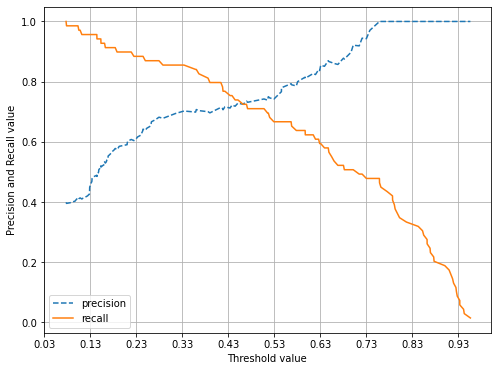

In [28]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )